<a href="https://colab.research.google.com/github/Toeysamm/2-64-NIDA-DADS5001/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
#!nvidia-smi -L

In [ ]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')


In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Churn_Modelling.csv"
data = pd.read_csv(path)
data 

'''

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\npath="/content/drive/MyDrive/Churn_Modelling.csv"\ndata = pd.read_csv(path)\ndata \n\n'

In [ ]:
#2
url = "https://drive.google.com/file/d/1-mT6iykRVgRU3blYpX5i_YxhbqjUJepP/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

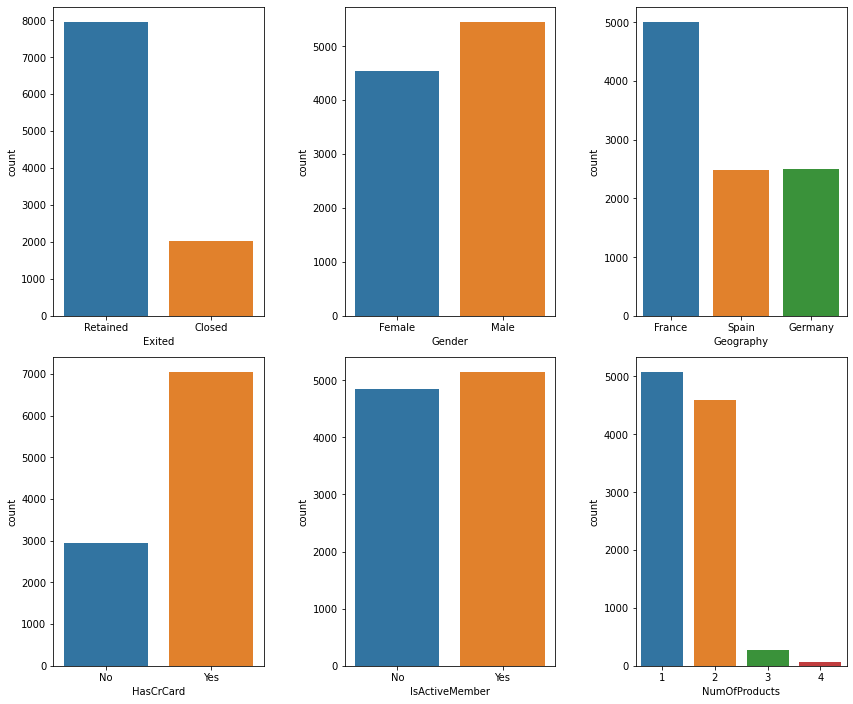

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12,10))
fig.tight_layout(pad=2, w_pad=5 , h_pad=2)
sns.countplot(df['Exited'], ax=ax[0,0])
ax[0,0].set_xticklabels(["Retained", "Closed"])
sns.countplot(df['Gender'], ax=ax[0,1])
sns.countplot(df['Geography'], ax=ax[0,2])
sns.countplot(df['HasCrCard'], ax=ax[1,0])
ax[1,0].set_xticklabels(["No", "Yes"])
sns.countplot(df['IsActiveMember'], ax=ax[1,1])
ax[1,1].set_xticklabels(["No", "Yes"])
sns.countplot(df['NumOfProducts'], ax=ax[1,2])

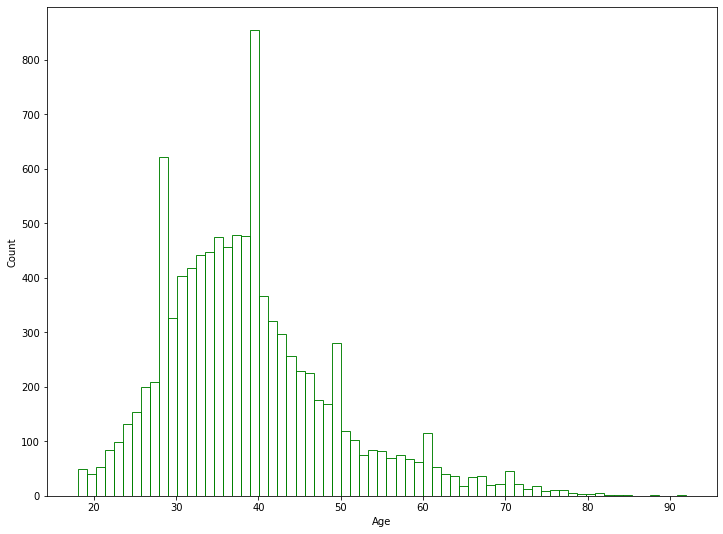

In [ ]:
plt.figure(figsize=(12, 9))
sns.histplot(df['Age'],color="green",fill=False)


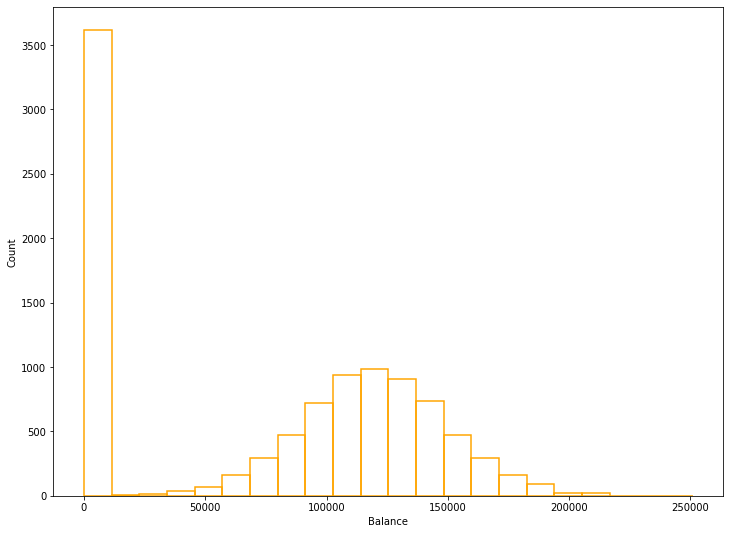

In [ ]:
plt.figure(figsize=(12, 9))
sns.histplot(df['Balance'],color="orange",fill=False)

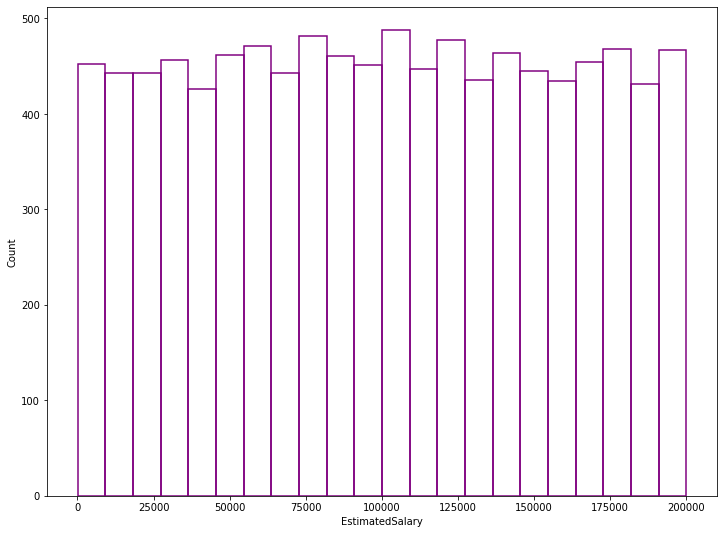

In [ ]:
plt.figure(figsize=(12, 9))
sns.histplot(df['EstimatedSalary'],color="purple",fill=False)

In [ ]:
#Cleansing+Normalize

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [ ]:
df['Gender'].replace(['Female'],0 , inplace=True)

In [ ]:
df['Gender'].replace(['Male'],1 , inplace=True)

In [ ]:
df['Gender'].unique()

array([0, 1])

In [ ]:
dummy=pd.get_dummies(df.Geography)
df=pd.concat([df, dummy], axis=1)
df.drop('Geography', axis=1, inplace=True)

In [ ]:
y = df['Exited']
df.drop(columns=['Exited'], axis=1, inplace=True)

In [ ]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [ ]:
norm_df=df.drop(columns=['Gender', 'HasCrCard','IsActiveMember','France','Germany','Spain'])

In [ ]:
norm_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,0.00,1,42085.58
9998,772,42,3,75075.31,2,92888.52


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scalar = preprocessing.MinMaxScaler()
col=norm_df.columns
norm=scalar.fit_transform(norm_df)
scalar_df=pd.DataFrame(norm,columns=col)


In [ ]:
scalar_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400
...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0.481341
9996,0.332,0.229730,1.0,0.228657,0.000000,0.508490
9997,0.718,0.243243,0.7,0.000000,0.000000,0.210390
9998,0.844,0.324324,0.3,0.299226,0.333333,0.464429


In [ ]:
df=pd.concat([df.drop(columns=col), scalar_df], axis=1)

In [ ]:
df

,Gender,HasCrCard,IsActiveMember,France,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0,1,1,1,0,0,0.538,0.324324,0.2,0.000000,0.000000,0.506735
1,0,0,1,0,0,1,0.516,0.310811,0.1,0.334031,0.000000,0.562709
2,0,1,0,1,0,0,0.304,0.324324,0.8,0.636357,0.666667,0.569654
3,0,0,0,1,0,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120
4,0,1,1,0,0,1,1.000,0.337838,0.2,0.500246,0.000000,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,0,0,0.842,0.283784,0.5,0.000000,0.333333,0.481341
9996,1,1,1,1,0,0,0.332,0.229730,1.0,0.228657,0.000000,0.508490
9997,0,0,1,1,0,0,0.718,0.243243,0.7,0.000000,0.000000,0.210390
9998,1,1,0,0,1,0,0.844,0.324324,0.3,0.299226,0.333333,0.464429


In [ ]:
#ML

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df , y , test_size = 0.3, random_state = 0)

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score , roc_curve ,roc_auc_score,confusion_matrix

In [ ]:
def class_report (X_test,Y_test,model):
  Y_predict = model.predict(X_test)
  print(f'{model} Classification Report')
  target_names = ['Retrained','Closed']
  print(classification_report(Y_test,Y_predict,target_names=target_names))
  print

def acc_score(X_test,Y_test,model):
  Y_predict = model.predict(X_test)
  acc = accuracy_score(Y_test, Y_predict)
  print(f"Accuracy = {acc*100:.2f}%")

def plot_crv(X_test,Y_test,model):
  Prob_Y_predict = model.predict_proba(X_test)[::,1]
  print(f"AUC_ROC = {roc_auc_score(Y_test,Prob_Y_predict)*100:.2f}%")
  fpr, tpr, _ = metrics.roc_curve(Y_test,  Prob_Y_predict)
  plt.plot(fpr,tpr)
  plt.plot([0,1], [0,1], 'red')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

def plot_cfm(X_test,Y_test,model):
  Y_predict=model.predict(X_test)
  cf_matrix = confusion_matrix(Y_test, Y_predict)
  print("Confusion Matrix")
  print(cf_matrix)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='YlGnBu',fmt='g')

  ax.set_title('Confusion Matrix Heatmap');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(['Retrained','Closed'])
  ax.yaxis.set_ticklabels(['Retrained','Closed'])
  plt.show()

Accuracy = 79.70%
AUC_ROC = 70.42%


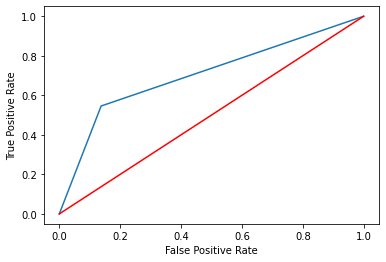

Confusion Matrix
[[2052  327]
 [ 282  339]]


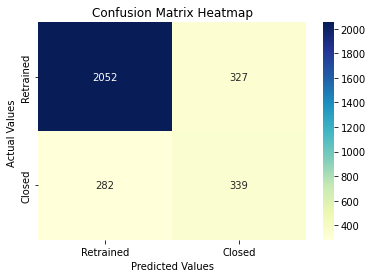

DecisionTreeClassifier() Classification Report
              precision    recall  f1-score   support

   Retrained       0.88      0.86      0.87      2379
      Closed       0.51      0.55      0.53       621

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
acc_score(X_test,Y_test,DT)
plot_crv(X_test,Y_test,DT)
plot_cfm(X_test,Y_test,DT)
class_report (X_test,Y_test,DT)

RandomForestClassifier() Classification Report

              precision    recall  f1-score   support

   Retrained       0.88      0.96      0.92      2379
      Closed       0.78      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.77      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy = 86.80%
AUC_ROC = 86.60%


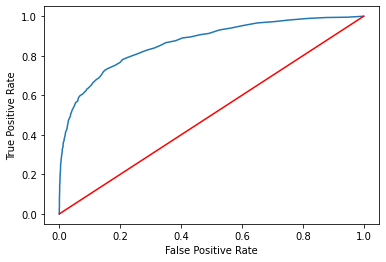

Confusion Matrix
[[2289   90]
 [ 306  315]]


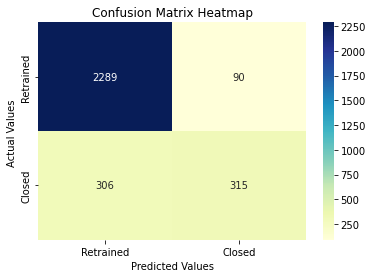

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
class_report(X_test,Y_test,RF)
acc_score(X_test,Y_test,RF)
plot_crv(X_test,Y_test,RF)
plot_cfm(X_test,Y_test,RF)

GradientBoostingClassifier() Classification Report

              precision    recall  f1-score   support

   Retrained       0.89      0.96      0.92      2379
      Closed       0.77      0.52      0.62       621

    accuracy                           0.87      3000
   macro avg       0.83      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy = 86.87%
AUC_ROC = 87.92%


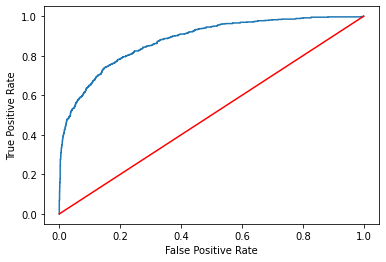

Confusion Matrix
[[2280   99]
 [ 295  326]]


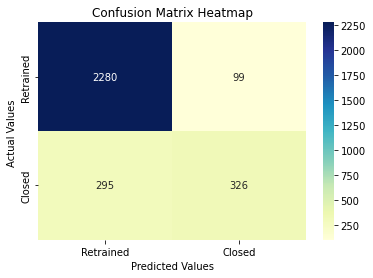

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)
class_report(X_test,Y_test,GB)
acc_score(X_test,Y_test,GB)
plot_crv(X_test,Y_test,GB)
plot_cfm(X_test,Y_test,GB)

XGBClassifier(n_estimators=180) Classification Report

              precision    recall  f1-score   support

   Retrained       0.88      0.96      0.92      2379
      Closed       0.76      0.52      0.61       621

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy = 86.60%
AUC_ROC = 87.65%


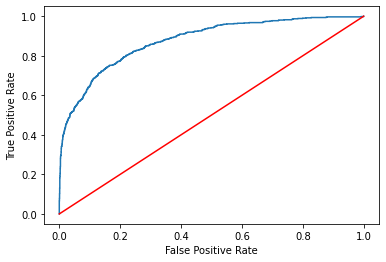

Confusion Matrix
[[2277  102]
 [ 300  321]]


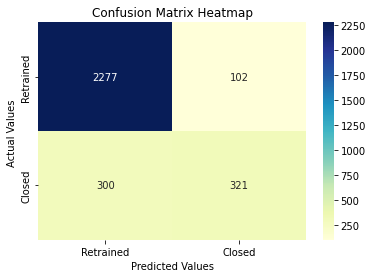

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate = 0.1, n_estimators = 180, max_depth = 3)
xgb_model.fit(X_train, Y_train)
class_report(X_test,Y_test,xgb_model)
acc_score(X_test,Y_test,xgb_model)
plot_crv(X_test,Y_test,xgb_model)
plot_cfm(X_test,Y_test,xgb_model)

In [ ]:
#MLP 

In [ ]:
X_train.shape

(7000, 12)

In [ ]:
Y_train.shape

(7000,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(12,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden1') )  
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden2') )   
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden3') )   
model.add( tf.keras.layers.Dropout(0.3) )                     

# Output layer
model.add(Dense(1, activation = 'sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 20)                260       
                                                                 
 bn1 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden2 (Dense)             (None, 20)                420       
                                                                 
 bn2 (BatchNormalization)    (None, 20)                80        
                                                                 
 hidden3 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
#model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

In [ ]:
history = model.fit ( X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback] )

Epoch 1/50
44/44 [==============================] - 4s 25ms/step - loss: 0.5716 - acc: 0.7246 - val_loss: 0.6044 - val_acc: 0.8000
Epoch 2/50
44/44 [==============================] - 0s 10ms/step - loss: 0.4982 - acc: 0.7898 - val_loss: 0.5477 - val_acc: 0.8000
Epoch 3/50
44/44 [==============================] - 1s 11ms/step - loss: 0.4785 - acc: 0.7902 - val_loss: 0.5094 - val_acc: 0.8000
Epoch 4/50
44/44 [==============================] - 0s 9ms/step - loss: 0.4645 - acc: 0.8002 - val_loss: 0.4851 - val_acc: 0.8007
Epoch 5/50
44/44 [==============================] - 0s 9ms/step - loss: 0.4571 - acc: 0.8127 - val_loss: 0.4632 - val_acc: 0.8021
Epoch 6/50
44/44 [==============================] - 1s 12ms/step - loss: 0.4463 - acc: 0.8139 - val_loss: 0.4436 - val_acc: 0.8043
Epoch 7/50
44/44 [==============================] - 0s 9ms/step - loss: 0.4362 - acc: 0.8159 - val_loss: 0.4348 - val_acc: 0.8186
Epoch 8/50
44/44 [==============================] - 0s 10ms/step - loss: 0.4337 - acc:

In [ ]:
!ls -lt

total 740
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch45_valloss0.35.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch43_valloss0.36.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch39_valloss0.36.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch36_valloss0.36.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch31_valloss0.36.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch30_valloss0.37.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch29_valloss0.37.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch28_valloss0.37.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch26_valloss0.38.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch25_valloss0.38.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch19_valloss0.40.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch16_valloss0.40.hdf5
-rw-r--r-- 1 root root 31216 Sep 12 18:20 bestmodel_epoch14_vallos

In [ ]:
#delete all save file in directory
#!rm *

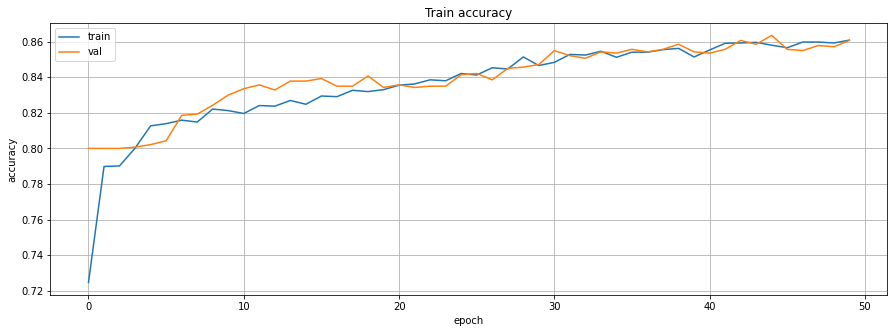

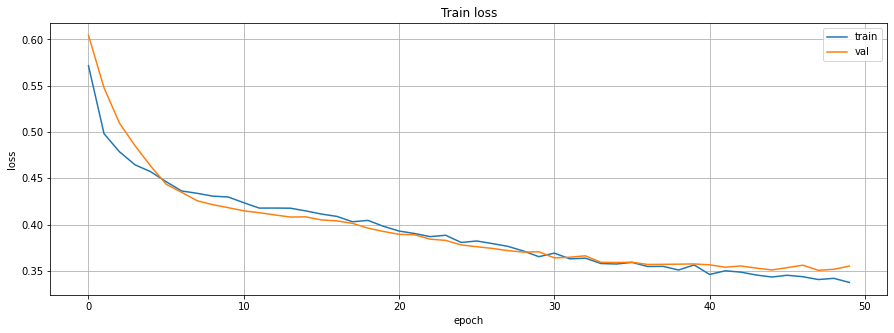

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print( f"{model.metrics_names} = {results}" )

24/24 [==============================] - 0s 2ms/step - loss: 0.3495 - acc: 0.8570
['loss', 'acc'] = [0.34945279359817505, 0.8569999933242798]


Accuracy Score = 85.70%
Confusion Matrix
[[2275  104]
 [ 325  296]]


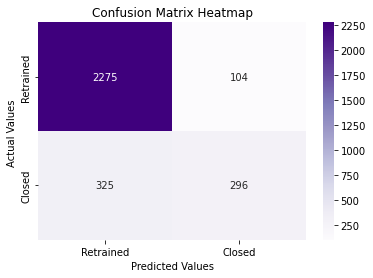

In [ ]:
Y_predict = model.predict(X_test)
for i in range(0, len(Y_predict)):
    if Y_predict[i] > 0.5:
        Y_predict[i] = 1
    else:
        Y_predict[i] = 0
accuracy = accuracy_score(Y_test, Y_predict) 
print(f"Accuracy Score = {accuracy*100:.2f}%")
cm = confusion_matrix(Y_test, Y_predict)
print("Confusion Matrix")
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Purples',fmt='g')

ax.set_title('Confusion Matrix Heatmap');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Retrained','Closed'])
ax.yaxis.set_ticklabels(['Retrained','Closed'])
plt.show()